- After grading comments: 1 class for to many methods, the OOP aspects of the code is not best practice, need to create more classes and understand how to utilize them

Test Data Classifications: ['Pikachu', 'Pichu', 'Pichu', 'Pikachu']


Your widths and heights classify as a pikachu


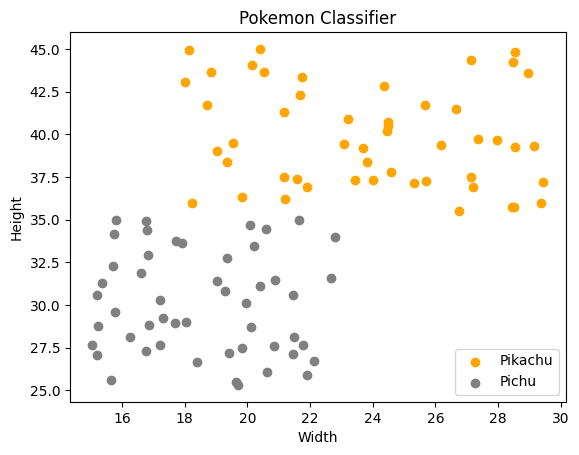

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#globally setting these variables to the two files, to then be used as arugments or values in functions/classes

pikachu_file = "pikachu.txt"
pichu_file = "pichu.txt"
test_filename = "test_points (3).txt"
class PokemonClassifier: 
    """A class which contains several functions for filereading and plotting for files, that cointans two coloumns of numeric values"""
        #Function that reads open and reads files and parses the values to int. processing the data
    def read_and_parse_data(self, filename):
        with open(filename, "r") as file:
            lines = file.readlines()
        #Open the files to then create variable, data, a list
        #ChatGPT - to parse the data from the files and slice
        #{
        data = []                                        
        for line in lines[1:]:                           #Iterate over each line starting from the second line
            values = line.strip().split(",")             #Remove any whitespaces and splits it by commas to get a list of values
            width = float(values[0].strip("()"))         #extracts the first value [0] in the file and converts it to float
            height = float(values[1].strip("()"))        #converts second value [1]
            data.append([width, height])                 #data.append appends a list containing the width and height
 
        #}
        return np.array(data)                            #convert the data list to a numpy array
        
    def __init__(self, pikachu_file, pichu_file):
        self.pikachu_data = self.read_and_parse_data(pikachu_file)
        self.pichu_data = self.read_and_parse_data(pichu_file)

    def plot_data(self):
        """Plotting the data files inserted as arguments in the PokemonClassifier class"""
        pikachu_widths = self.pikachu_data[:, 0]  # : = all rows 0 = first element of rows, Extracting widths of Pikachu
        pikachu_heights = self.pikachu_data[:, 1] 
    
        pichu_widths = self.pichu_data[:, 0]  
        pichu_heights = self.pichu_data[:, 1]  

        plt.scatter(pikachu_widths, pikachu_heights, color="orange", label="Pikachu") #Scatter the data using
        plt.scatter(pichu_widths, pichu_heights, color="grey", label="Pichu")

        plt.xlabel("Width")
        plt.ylabel("Height")
        plt.title("Pokemon Classifier")
        plt.legend(loc="lower right")
    plt.show()
    


    def classify_test_data(self, file_path): 
        """Method to classify the test_points file, the fileparsing is not universal and unique to the test_points.txt"""
        classifications = []
        with open(file_path, 'r') as file:
            for line in file:
                values = line.strip()[1:-1].split("), (") #remove first and last character in the text file, then split the strings into a list
                for value in values:  #nested for loop to now iterate over the values that got extracted, this i needed to ask ChatGpt 
                    width, height = map(float, value.split(",")) #Altarnate line of code, the map applies float to all elements in the list this is an altarnate but less effective and readable, width, height = float(value.split(",")[0]), float(value.split(",")[1])

                    test_point = np.array([width, height])

                    pikachu_distances = np.linalg.norm(test_point - self.pikachu_data, axis=1)
                    pichu_distances = np.linalg.norm(test_point - self.pichu_data, axis=1)
                    if np.min(pikachu_distances) < np.min(pichu_distances):
                        classifications.append("Pikachu")
                    else:
                        classifications.append("Pichu")
        return classifications


    def user_data_input(self):

        width = input("Enter a width")
        height = input("Enter a height")

        try:
            width = float(width)
            height = float(height)
        except ValueError:
            raise ValueError(f"width and height must be numeric values, enter a number.")
        
        if width <= 0 or height <= 0:
            raise ValueError(f"Both width and height must be positive numbers")
        if width == " " or height == " ":
            raise TypeError(f"width and height must be filled out")
        
        user_data = np.array([width, height])
        return user_data
    

    
   #Alternate algorithm to classify the data, it is flawed as the sums can be misleading if one point is very far away the sum of the distance can be greatly increase even though it should be classified as respective pokemon
   
   #def classify_user_data(self):
   #    user_data = self.user_data_input()

   #    pikachu_distance = np.linalg.norm(user_data - self.pikachu_data, axis=1)
   #    pichu_distances = np.linalg.norm(user_data - self.pichu_data, axis=1)

   #    closest_pikachu_indices = np.argsort(pikachu_distance)[:5] 
   #    closest_pichu_indices = np.argsort(pichu_distances)[:5] 

   #    pikachu_sum_distance = np.sum(pikachu_distance[closest_pikachu_indices])
   #    pichu_sum_distance = np.sum(pichu_distances[closest_pichu_indices])

   #    if pikachu_sum_distance < pichu_sum_distance:
   #        print("Your widths and heights classify as pikachu ")
   #    else:
   #        print("Your widths and heights classify as pichu ")



    def classify_user_data(self):
            
            user_data = self.user_data_input()
            pikachu_distances = np.linalg.norm(user_data - self.pikachu_data, axis=1)
            pichu_distances = np.linalg.norm(user_data - self.pichu_data, axis=1)
    
            combined_distances = np.column_stack((pikachu_distances, pichu_distances)) #Combining the two lists to get a 2D array iwth distances
            sorted_indices = np.argsort(combined_distances, axis=0) #sort by indices 
    
            pikachu_count = 0 #Count for each starts at zero then a loop in range of 5
            pichu_count = 0
            for i in range(5):
                if sorted_indices[i, 0] < sorted_indices[i, 1]:
                    pikachu_count += 1
                else:
                    pichu_count += 1
    
            if pikachu_count > pichu_count:
                print("Your widths and heights classify as a pikachu")
            else:
                print("Your widths and heights classify as a pichu")



# create an instance of the class, pass in files
classifier = PokemonClassifier(pikachu_file, pichu_file)
# Run plot_data method to visualize the data
classifier.plot_data()
# Run classify_test_data using above instance of the class pass in the testpoints file
test_classifications = classifier.classify_test_data(test_filename)
print("Test Data Classifications:", test_classifications) # Print out the test_classifications this contains the classification list that we appended the pikachu or pichu depending on the testpoints  
# Run user_data_input
user_data_classification = classifier.classify_user_data()

In [1]:
# For the last two problems in the assingment: note that this is mostly mock-up code, for implementation comes at a later stage since i did not find the time, this is also with GREAT help from chat gpt
# For my own sake i want to see how the code can look like,
def shuffle_and_split_data(self, test_ratio=0.1): #10% is test data rest is training data
        # Shuffle the data using 
        np.random.shuffle(self.pikachu_data)
        np.random.shuffle(self.pichu_data)

        
        pikachu_split_index = int(len(self.pikachu_data) * (1 - test_ratio))
        pichu_split_index = int(len(self.pichu_data) * (1 - test_ratio))

        # Split the data into training and test sets
        self.pikachu_train = self.pikachu_data[:pikachu_split_index]
        self.pikachu_test = self.pikachu_data[pikachu_split_index:]

        self.pichu_train = self.pichu_data[:pichu_split_index]
        self.pichu_test = self.pichu_data[pichu_split_index:]


#this one i had problems with using MUCH help this is what a method to calculate accuracy could look like: 
        
def calculate_accuracy(self, true_labels, predicted_labels):
        correct_count = sum(1 for true_label, predicted_label in zip(true_labels, predicted_labels) if true_label == predicted_label)
        total_count = len(true_labels)
        accuracy = correct_count / total_count * 100
        return accuracy

def calculate_confusion_matrix(self, true_labels, predicted_labels, positive_class):
    TP = sum(1 for true_label, predicted_label in zip(true_labels, predicted_labels) if true_label == positive_class and predicted_label == positive_class)
    FP = sum(1 for true_label, predicted_label in zip(true_labels, predicted_labels) if true_label != positive_class and predicted_label == positive_class)
    FN = sum(1 for true_label, predicted_label in zip(true_labels, predicted_labels) if true_label == positive_class and predicted_label != positive_class)
    TN = sum(1 for true_label, predicted_label in zip(true_labels, predicted_labels) if true_label != positive_class and predicted_label != positive_class)
    return TP, FP, FN, TN
def evaluate_classifier(self, test_data, true_labels):
    predicted_labels = self.classify_test_data(test_data)
    accuracy = self.calculate_accuracy(true_labels, predicted_labels)
    return accuracy
def display_confusion_matrix(self, true_labels, predicted_labels, positive_class):
    TP, FP, FN, TN = self.calculate_confusion_matrix(true_labels, predicted_labels, positive_class)
    print(f"Confusion Matrix for {positive_class}:")
    print("      | actual")
    print("predicted | Pikachu  | Pichu")
    print("----------------------------")
    print(f"{positive_class} |   {TP}     |   {FP}")
    print("----------------------------")
    print(f"Not {positive_class} |   {FN}     |   {TN}")
    print()